In [58]:
import matplotlib.pyplot as plt
import math
import numpy as np

class derivadas:
    def __init__(self, funcao):
        self.funcao = funcao

    def diferenca_progressiva(self,f, x, h):
        
        return (f(x + h) - f(x)) / h

def f(x):
    return sin(x)


In [59]:
#Exercício 2

from jax import grad
import jax.numpy as jnp

def metodo_newton(f, df, x0, limite, tol):
    xk = x0
    k = 0
    for k in range(limite):
        fx = f(xk)
    
        if (abs(fx) < tol):
            break

        dfx = df(xk)
        if dfx == 0:
            raise ValueError("Derivada zero. O método de Newton falhou.")
        
        xk = xk - fx / dfx

    return xk, k


def f(x):
     return jnp.exp(x) + 2.0**(-x) + 2.0*jnp.cos(x) - 6.0
    
df = grad(f)

a, b = 1.0, 2.0
x0 = (a + b) / 2.0
tolerancia = 1e-6

raiz, passos = metodo_newton(f, df, x0, 100, tolerancia)
print(f"Raiz encontrada: {raiz:.6f}\nNúmero de passos: {passos}")


Raiz encontrada: 1.829383
Número de passos: 4


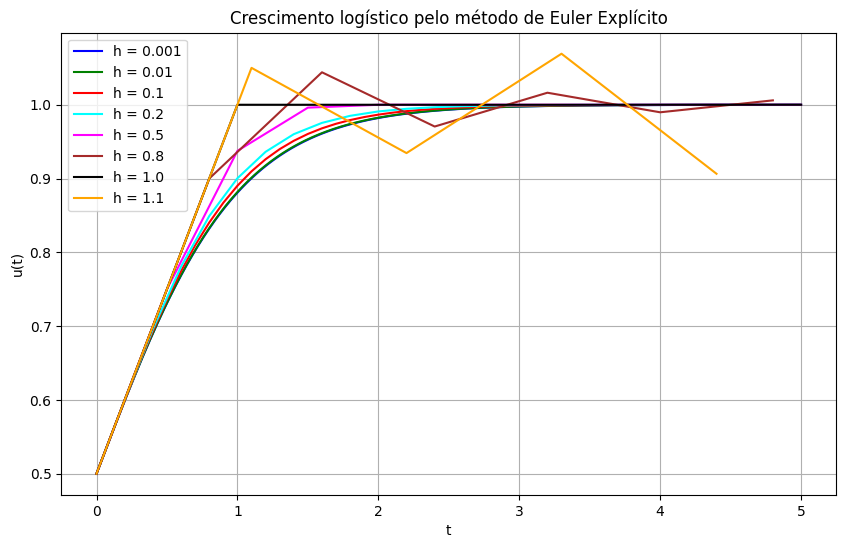

t1 = 0.00, y = 0.500500
t2 = 0.00, y = 0.501000
t3 = 0.00, y = 0.501500
t4 = 0.00, y = 0.502000
t5 = 0.01, y = 0.502500
t6 = 0.01, y = 0.503000
t7 = 0.01, y = 0.503500
t8 = 0.01, y = 0.504000
t9 = 0.01, y = 0.504500
t10 = 0.01, y = 0.505000
t11 = 0.01, y = 0.505500
t12 = 0.01, y = 0.506000
t13 = 0.01, y = 0.506500
t14 = 0.01, y = 0.507000
t15 = 0.01, y = 0.507499
t16 = 0.02, y = 0.507999
t17 = 0.02, y = 0.508499
t18 = 0.02, y = 0.508999
t19 = 0.02, y = 0.509499
t20 = 0.02, y = 0.509999
t21 = 0.02, y = 0.510499
t22 = 0.02, y = 0.510998
t23 = 0.02, y = 0.511498
t24 = 0.02, y = 0.511998
t25 = 0.03, y = 0.512498
t26 = 0.03, y = 0.512997
t27 = 0.03, y = 0.513497
t28 = 0.03, y = 0.513997
t29 = 0.03, y = 0.514496
t30 = 0.03, y = 0.514996
t31 = 0.03, y = 0.515495
t32 = 0.03, y = 0.515995
t33 = 0.03, y = 0.516494
t34 = 0.03, y = 0.516994
t35 = 0.04, y = 0.517493
t36 = 0.04, y = 0.517993
t37 = 0.04, y = 0.518492
t38 = 0.04, y = 0.518991
t39 = 0.04, y = 0.519490
t40 = 0.04, y = 0.519990
t41 = 0.0

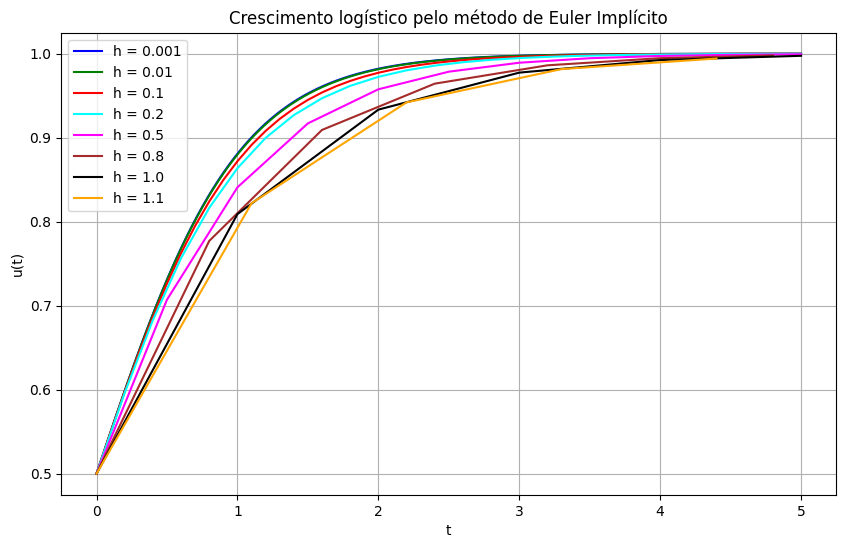

In [60]:
#Exercício 3, euler explícito


def euler_explicito(f, t0, tf, h, y0):
    N = int((tf - t0) / h)
    
    t_values = [t0]
    y_values = [y0]

    for i in range(N):
        prev = y0
        y0 = y0 + h * f(y0, t0)
        t0 = t0 + h
        t_values.append(t0)
        y_values.append(y0)


    return t_values, y_values




def euler_implicito(f, df, t0, tf, h, y0, tol, limite):
        N = int((tf - t0) / h)
        t_values = [t0]
        y_values = [y0]


        for i in range (int(N)):
            t_next = t0 + h

            G = lambda y: y - y0 - h * f(y, t_next)

            dGdy = lambda y: 1 - h * df(y, t_next)

            x0 = y0 + h * f(y0, t0)  # chute inicial preditivo para o método de Newton

            y0, k = metodo_newton(G, dGdy, x0, limite, tol=tol)

            if(k == limite -1):
                print(f"Warning: Newton's method did not converge at step {i+1}")
                break

            t0 = t_next
            t_values.append(t0)
            y_values.append(y0)

            print(f"t{i+1} = {(i+1)*h:.2f}, y = {y0:.6f}")

        return t_values, y_values





def f(u, t):
    return 2.0*(u - u**2.0)

df = grad(f)  # Derivada em relação a u

valores_h = [0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1.0, 1.1]
y0 = 0.5
t0, tf = 0.0, 5.0



cores = ['blue', 'green', 'red', 'cyan', 'magenta', 'brown', 'black', 'orange']
plt.figure(figsize=(10, 6))

for h, cor in zip(valores_h, cores):
    t_values, y_values = euler_explicito(f, t0, tf, h, y0)
    plt.plot(t_values, y_values, label=f'h = {h}', color=cor)

plt.title("Crescimento logístico pelo método de Euler Explícito")

plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()
plt.grid()
plt.show()



plt.figure(figsize=(10, 6))
for h, cor in zip(valores_h, cores):
    t_values, y_values = euler_implicito(f, df, t0, tf, h, y0, tol=1e-6, limite=100)
    plt.plot(t_values, y_values, label=f'h = {h}', color=cor)

plt.title("Crescimento logístico pelo método de Euler Implícito")

plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()
plt.grid()
plt.show()


In [61]:
#Exercício 3, parte 2
